<a href="https://colab.research.google.com/github/shaanvithabandewar/data_science_assignmets/blob/main/assignment_8_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_excel('EastWestAirlines.xlsx')

# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# Print non-numeric columns to check if any numeric columns are included mistakenly
print(f"Non-numeric columns: {non_numeric_cols}")

# Drop non-numeric columns
df = df.drop(columns=non_numeric_cols)

# Check if the DataFrame is empty after dropping columns
if df.empty:
    print("DataFrame is empty after dropping non-numeric columns. Check the data types in your Excel file.")
else:
    # Handling missing values for numeric columns
    imputer = SimpleImputer(strategy='mean')
    df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

    # Feature scaling
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

Non-numeric columns: Index(['East-West Airlines is trying to learn more about its customers.  Key issues are their',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],
      dtype='object')
DataFrame is empty after dropping non-numeric columns. Check the data types in your Excel file.


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_excel('EastWestAirlines.xlsx')

# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# Print non-numeric columns to check if any numeric columns are included mistakenly
print(f"Non-numeric columns: {non_numeric_cols}")

# Instead of dropping all non-numeric columns, investigate each one and decide
# if it should be transformed to numeric or dropped. For example, if there are
# any date or categorical columns that could be useful, they should be converted
# to numeric representations.
# For this example, we will drop the non-numeric columns

df = df.drop(columns=non_numeric_cols)

# Check if the DataFrame is empty after dropping columns
if df.empty:
    print("DataFrame is empty after dropping non-numeric columns. Check the data types in your Excel file.")
else:
    # Handling missing values for numeric columns
    imputer = SimpleImputer(strategy='mean')

    # Apply the imputer only to numeric columns
    df_numeric = df.select_dtypes(include=['number'])
    df_numeric = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

    # Feature scaling for numeric columns
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

Non-numeric columns: Index(['East-West Airlines is trying to learn more about its customers.  Key issues are their',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],
      dtype='object')
DataFrame is empty after dropping non-numeric columns. Check the data types in your Excel file.


Non-numeric columns: Index([], dtype='object')


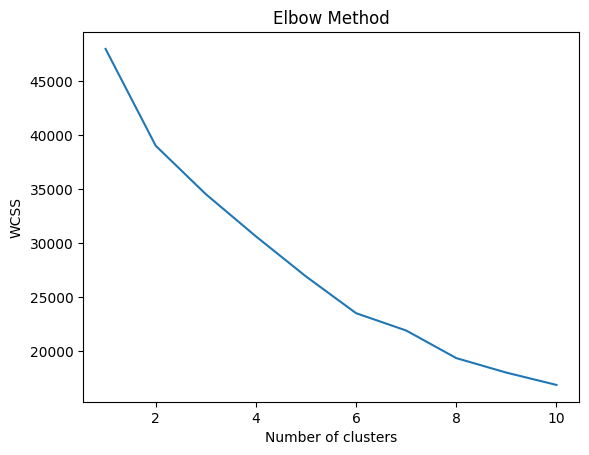

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt # make sure to import matplotlib

# Load the dataset
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data') # specify sheet name

# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# Print non-numeric columns to check if any numeric columns are included mistakenly
print(f"Non-numeric columns: {non_numeric_cols}")

# Instead of dropping all non-numeric columns, investigate each one and decide
# if it should be transformed to numeric or dropped. For example, if there are
# any date or categorical columns that could be useful, they should be converted
# to numeric representations.
# For this example, we will drop the non-numeric columns

df = df.drop(columns=non_numeric_cols)

# Check if the DataFrame is empty after dropping columns
if df.empty:
    print("DataFrame is empty after dropping non-numeric columns. Check the data types in your Excel file.")
else:
    # Handling missing values for numeric columns
    imputer = SimpleImputer(strategy='mean')

    # Apply the imputer only to numeric columns
    df_numeric = df.select_dtypes(include=['number'])
    df_numeric = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

    # Feature scaling for numeric columns
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)

    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply KMeans with the optimal number of clusters
optimal_clusters = 4  # Replace with the number determined from the Elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters_kmeans = kmeans.fit_predict(df_scaled)

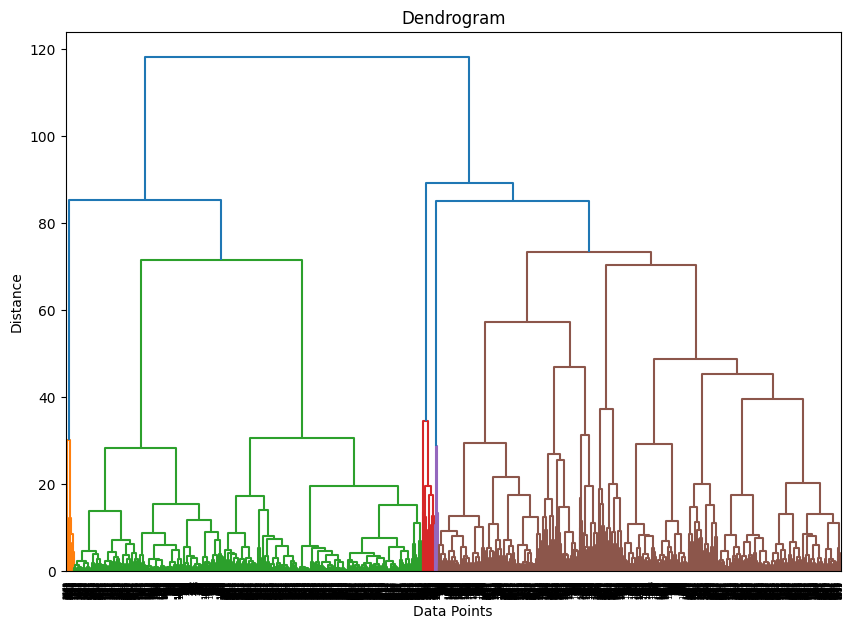

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix
linked = linkage(df_scaled, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Apply Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=optimal_clusters, affinity='euclidean', linkage='ward')
clusters_hc = hc.fit_predict(df_scaled)


In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(df_scaled)


In [ ]:
# Adding cluster labels to the original dataset
df['KMeans_Cluster'] = clusters_kmeans
df['HC_Cluster'] = clusters_hc
df['DBSCAN_Cluster'] = clusters_dbscan

# Analyze the characteristics of each cluster
print(df.groupby('KMeans_Cluster').mean())
print(df.groupby('HC_Cluster').mean())
print(df.groupby('DBSCAN_Cluster').mean())


                        ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                 
0               3133.055231   39898.197531  106.287199   1.388564   1.016894   
1               1532.492552  127734.216485  160.202582   3.959285   1.001986   
2               1094.120278   56985.831149   96.370085   1.363917   1.018504   
3               1751.262821  194803.871795  810.397436   2.198718   1.038462   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                1.000000   6271.906433     7.831709         201.923977   
1                1.047666  45887.323734    19.507448         371.256207   
2                1.000771   5886.720894     7.996916         227.814187   
3                1.000000  32475.410256    27.737179        5510.717949   

                Flight_trans_12  Days_since_enroll    Award?  HC_Clu

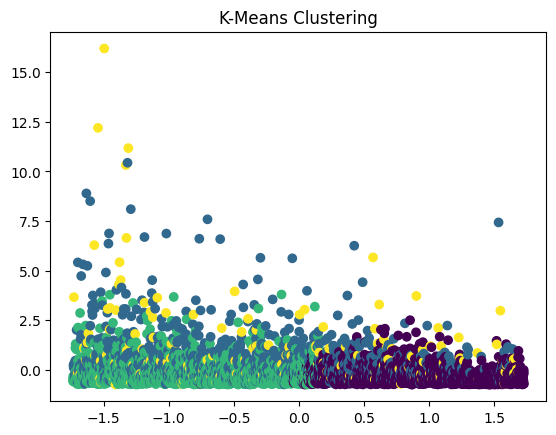

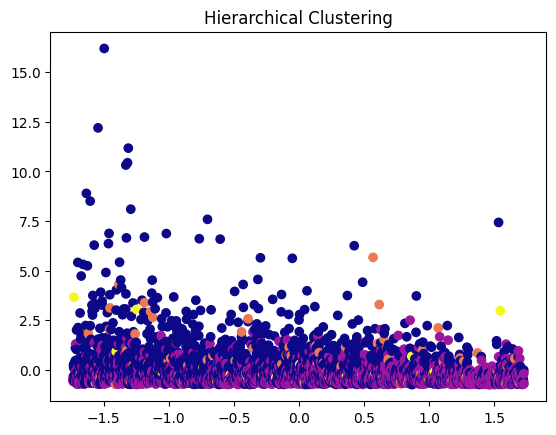

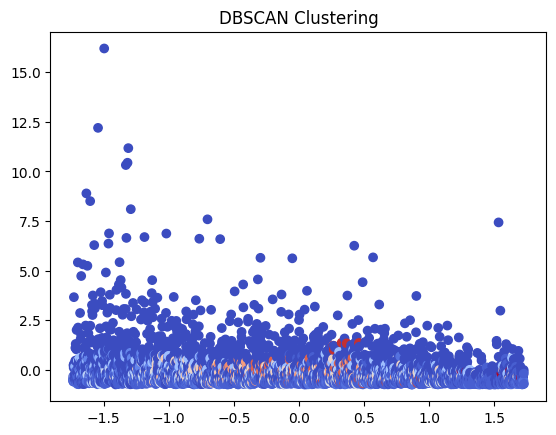

In [ ]:
# K-Means clustering visualization
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=clusters_kmeans, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

# Hierarchical clustering visualization
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=clusters_hc, cmap='plasma')
plt.title('Hierarchical Clustering')
plt.show()

# DBSCAN clustering visualization
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=clusters_dbscan, cmap='coolwarm')
plt.title('DBSCAN Clustering')
plt.show()


In [ ]:
# Silhouette Score for K-Means
silhouette_kmeans = silhouette_score(df_scaled, clusters_kmeans)
print(f'Silhouette Score for K-Means: {silhouette_kmeans}')

# Silhouette Score for DBSCAN
silhouette_dbscan = silhouette_score(df_scaled, clusters_dbscan)
print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')


Silhouette Score for K-Means: 0.22808887010836637
Silhouette Score for DBSCAN: -0.2823258834687895
